# Federico Andrucci - 000105...

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix

# Variables
file_name = 'exam_2021_01_15.csv'
separator = ','
random_state = 42

# Directives
%matplotlib inline
np.random.seed(random_state)

1. load the data and separate in X all the columns but the last
one, in y the last column, then produce a pairplot of X and
comment what you see (4pt)
2. find the best clustering scheme for X with a method of your
choice, plot the silhouhette index for an appropriate range of
parameters and show the chosen hyperparameter(s)
(4pt)
3. fit the clustering scheme store the cluster labels in y_km and
output the silhouette score (2pt)
4. use the labels in the last column of the input file as the “gold
standard” for the clustering and compare y_km and y; for an
effective comparison, each label in y_km must be remapped
to the best label in y; compute and apply this re-mapping (5pt)
5. produce the confusion matrix comparing y and y_km with
sklearn.metrics.confusion_matrix, (2pt)
6. consider possible pre-processing actions, repeat the fitting
and evaluate as before the result of the new fitting (8pt)

## 1. load the data and separate in X all the columns but the last one, in y the last column, then produce a pairplot of X and comment what you see (4pt)

In [2]:
# load the data
df = pd.read_csv(file_name, delimiter=separator)

# separate in X all the columns but the last one, in y the last one
last_column = 'y'
X = df.drop(last_column, axis=1)
y = df[last_column]

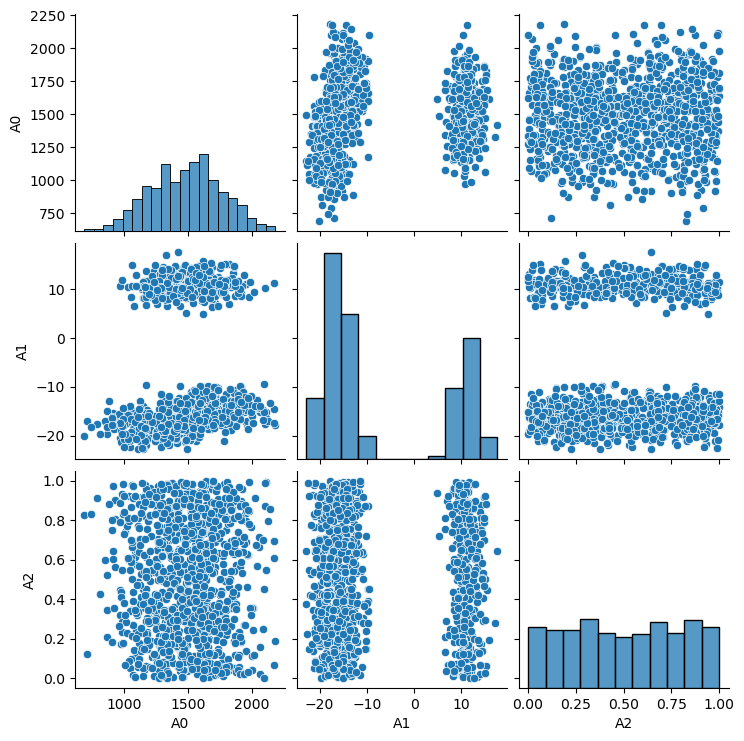

In [3]:
# Produce a pairplot of X
sns.pairplot(X)

From the pairplot its clear that the columns (A0, A1) and (A1, A2) show 2 distinct clusters.

## 2. find the best clustering scheme for X with a method of your choice, plot the silhouhette index for an appropriate range of parameters and show the chosen hyperparameter(s) (4pt)
_consider carefully the number of clusters, simple optimisation of the silhouette will not be enough, decide visually the best number of clusters_

In [4]:
# range of possible clusters
k_range = range(2, 11)

# silhouette score as measure
silhouette_scores = []

for i in k_range:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=random_state)

    # fit predict
    y_km = km.fit_predict(X)

    # store the silhouette score measure
    silhouette_scores.append(silhouette_score(X, y_km))

Plot silhouette scores

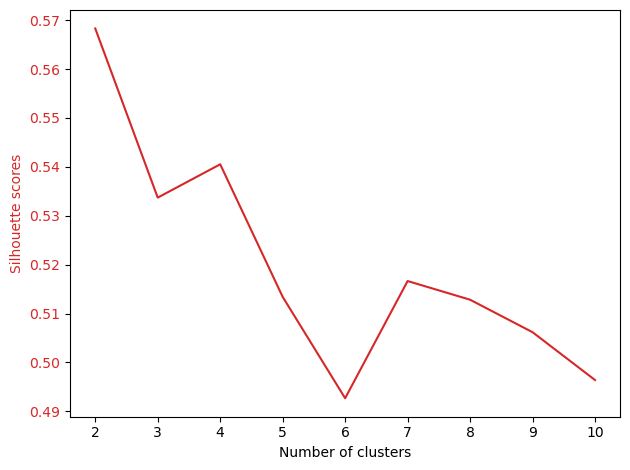

In [5]:
fig, ax = plt.subplots()
color = 'tab:red'
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette scores', color=color)
ax.plot(k_range, silhouette_scores, color=color)
ax.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.show()

The silhouette scores tells us that the best number of clusters is 2.

But if we take a closer look to the y we will notice that there are 3 values, so we choose 3 as our cluster number.

In [6]:
best_k = 3

## 3. fit the clustering scheme store the cluster labels in y_km and output the silhouette score (2pt)

In [7]:
km = KMeans(n_clusters=best_k, init='k-means++', n_init=10, max_iter=300, random_state=random_state)
y_km = km.fit_predict(X)

print(f"The silhouette score for {best_k} clusters is: {silhouette_score(X, y_km)}")

The silhouette score for 3 clusters is: 0.5337106344943366


## 4. use the labels in the last column of the input file as the “gold standard” for the clustering and compare y_km and y; for an effective comparison, each label in y_km must be remapped to the best label in y; compute and apply this re-mapping (5pt)

_hint for each subset of the data with x in y_km find the most frequent label in y_

In [8]:
previous_label = y_km[0]
start_index = 0
changes = 0

for i, label in enumerate(y_km):
    
    # apply remapping
    if label != previous_label:

        # count the occurencies in the corresponding y_km subset
        occurencies = np.bincount(y[start_index:i])

        #find which cluster index is the most frequent
        gold_standard = np.argmax(occurencies)

        #remap the clusters
        for i in range(start_index, i):
            if y_km[i] != gold_standard:
                y_km[i] = gold_standard
                changes = changes + 1

        # the current index will be the new start index
        start_index = i
        
    # save the current label at previous_label
    previous_label = label

In [9]:
print(f"This remapping performed {changes} changes to y_km subsets")

This remapping performed 812 changes to y_km subsets


## 5. produce the confusion matrix comparing y and y_km with sklearn.metrics.confusion_matrix, (2pt)

In [10]:
cm = confusion_matrix(y, y_km)
cm

array([[274,  32,  28],
       [127, 189,  17],
       [117,  89, 127]])